In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train and test CSV files
train = pd.read_csv("C:\\Users\\HP1\\python codes\\docs\\titanic_train.csv")
test = pd.read_csv("C:\\Users\\HP1\\python codes\\docs\\titanic_test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lulic, Mr. Nikola",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
# To find out if thre are any null values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
#We can see that except for the above mentioned missing values, no NaN values exist.

Percentage Females : 74.20382165605095
Percentage of Males: 18.890814558058924


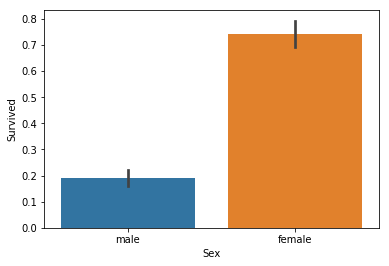

In [5]:
#We're now drawing a bar plot to see the amount of men and women that survived 
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage Females :", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of Males:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Pclass = 1 Survived: 62.96296296296296
Pclass = 2 Survived: 47.28260869565217
Pclass = 3 Survived: 24.236252545824847


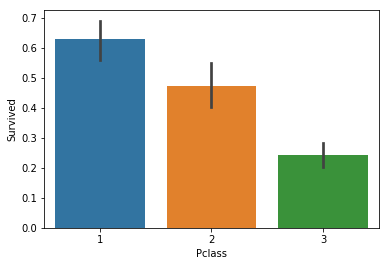

In [6]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Pclass = 1 Survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Pclass = 2 Survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Pclass = 3 Survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

SibSp = 0 that survived: 34.53947368421053
SibSp = 1 that survived: 53.588516746411486
SibSp = 2 that survived: 46.42857142857143


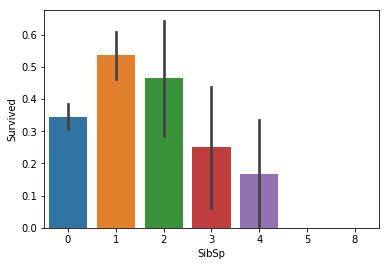

In [7]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("SibSp = 0 that survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("SibSp = 1 that survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("SibSp = 2 that survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

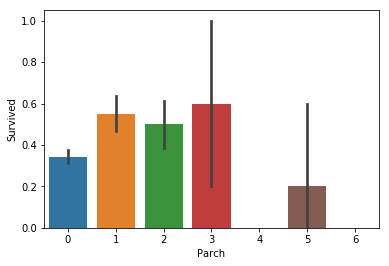

In [8]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

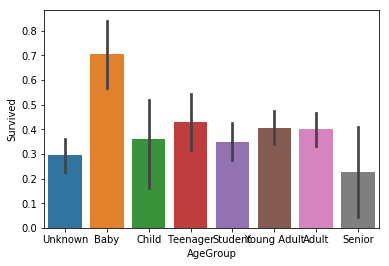

In [9]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"],bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"],bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


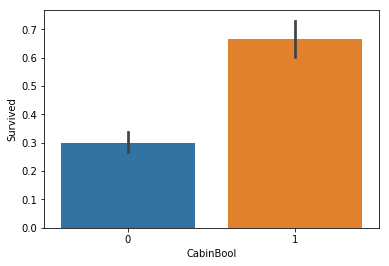

In [10]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int')) # to convert null vales to 0
test["CabinBool"] = (test["Cabin"].notnull().astype('int')) # to convert null values to 0

#Percentage of CabinBool vs. survived along with graph
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()


In [11]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Peacock, Master. Alfred Edward",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [12]:
#Dropping useless information.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['AgeGroup'], axis = 1)
test = test.drop(['AgeGroup'], axis = 1)

In [13]:

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [14]:
#Filling missing values in Embarked feature
print("people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

people embarking in Southampton (S):
644
people embarking in Cherbourg (C):
168
people embarking in Queenstown (Q):
77


In [15]:
#Exchanging the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

In [16]:


#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [17]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [18]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,0,1,0,7.2500,S,0
1,2,1,1,1,1,0,71.2833,C,1
2,3,1,3,1,0,0,7.9250,S,0
3,4,1,1,1,1,0,53.1000,S,1
4,5,0,3,0,0,0,8.0500,S,0


In [19]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,0,1,0,7.2500,1,0
1,2,1,1,1,1,0,71.2833,2,1
2,3,1,3,1,0,0,7.9250,1,0
3,4,1,1,1,1,0,53.1000,1,1
4,5,0,3,0,0,0,8.0500,1,0


In [20]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [21]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,FareBand
0,1,0,3,0,1,0,1,0,1
1,2,1,1,1,1,0,2,1,4
2,3,1,3,1,0,0,1,0,2
3,4,1,1,1,1,0,1,1,4
4,5,0,3,0,0,0,1,0,2


In [22]:
#check test data
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,FareBand
0,892,3,0,0,0,3,0,1
1,893,3,1,1,0,1,0,1
2,894,2,0,0,0,3,0,2
3,895,3,0,0,0,1,0,2
4,896,3,1,1,1,1,0,2


In [23]:
#Choosing the best model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.33, random_state = 0)

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(x_train, y_train)
y_pred = model_logistic_regression.predict(x_val)
score_logistic_regression = round(accuracy_score(y_pred, y_val) * 100, 2)
print(score_logistic_regression)

79.66


In [25]:
# Support Vector Machines
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(x_train, y_train)
y_pred = model_svc.predict(x_val)
score_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(score_svc)

80.0


In [26]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_gaussian = GaussianNB()
model_gaussian.fit(x_train, y_train)
y_pred = model_gaussian.predict(x_val)
score_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(score_gaussian)

76.95


In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(x_train, y_train)
y_pred = model_decisiontree.predict(x_val)
score_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(score_decisiontree)

81.02


In [28]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_val)
score_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(score_knn)

77.29


In [29]:
# Perceptron
from sklearn.linear_model import Perceptron

model_perceptron = Perceptron()
model_perceptron.fit(x_train, y_train)
y_pred = model_perceptron.predict(x_val)
score_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(score_perceptron)

75.93


In [30]:
models = pd.DataFrame({
    'Model': [ 'KNN','Support Vector Machines', 'Logistic Regression','Perceptron' , 'Naive Bayes', 
              'Decision Tree'],
    'Score': [score_knn, score_svc,  score_logistic_regression , score_perceptron, score_gaussian,  score_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,81.02
1,Support Vector Machines,80.00
2,Logistic Regression,79.66
0,KNN,77.29
4,Naive Bayes,76.95
3,Perceptron,75.93


In [31]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = model_gaussian.predict(test.drop('PassengerId',axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('C:\\Users\\HP1\\python codes\\docs\\titanic_submission.csv', index=False)